In [69]:
#Importing the necessary modules and owid-covid-data.csv

import pandas as pd
import numpy as np
import seaborn as sns

covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.shape

(59759, 50)

This covid data set contains the 50 columns and 59759 rows. As there are many columns, we create a dataframe having the necessary columns and to ease the retrieval of the data, add index column to it.

In [29]:
analyse_data_cardio = pd.DataFrame(covid_data[['iso_code', 'continent', 'location','date', 'total_cases', 
                                               'total_deaths', 'cardiovasc_death_rate', 'female_smokers', 
                                               'male_smokers', 'diabetes_prevalence']])

analyse_data_cardio['index'] = pd.Series(range(0,59758))
analyse_data_cardio.head()

,iso_code,continent,location,date,total_cases,total_deaths,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,index
0,ABW,North America,Aruba,2020-03-13,2.0,NaN,NaN,NaN,NaN,11.62,0.0
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,11.62,1.0
2,ABW,North America,Aruba,2020-03-20,4.0,NaN,NaN,NaN,NaN,11.62,2.0
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,11.62,3.0
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,11.62,4.0


In [30]:
analyse_data_cardio.tail()

,iso_code,continent,location,date,total_cases,total_deaths,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,index
59754,NaN,NaN,International,2020-11-24,696.0,7.0,NaN,NaN,NaN,NaN,59754.0
59755,NaN,NaN,International,2020-11-25,696.0,7.0,NaN,NaN,NaN,NaN,59755.0
59756,NaN,NaN,International,2020-11-26,696.0,7.0,NaN,NaN,NaN,NaN,59756.0
59757,NaN,NaN,International,2020-11-27,696.0,7.0,NaN,NaN,NaN,NaN,59757.0
59758,NaN,NaN,International,2020-11-28,696.0,7.0,NaN,NaN,NaN,NaN,NaN


From the data above, it is observed that there are many null values present. For the columns, total_cases, total_deaths, cardiovasc_death_rate null values can be converted into 0.

In [75]:
analyse_data_cardio.describe()

,total_cases,total_deaths,cardiovasc_death_rate,female_smokers,male_smokers,diabetes_prevalence,index
count,5.942500e+04,5.942500e+04,59425.000000,59425.000000,59425.000000,59425.000000,59425.00000
mean,1.735593e+05,5.636448e+03,225.927544,10.731235,32.641855,8.078223,29712.00000
std,1.812220e+06,5.207637e+04,135.872421,8.719425,11.136556,4.046471,17154.66421
min,0.000000e+00,0.000000e+00,0.000000,0.100000,7.700000,0.990000,0.00000
25%,9.800000e+01,1.000000e+00,128.346000,3.100000,26.700000,5.500000,14856.00000
50%,1.784000e+03,3.500000e+01,227.331000,10.731235,32.641855,7.260000,29712.00000
75%,2.077000e+04,4.060000e+02,304.195000,12.000000,37.400000,10.080000,44568.00000
max,6.171512e+07,1.444235e+06,724.417000,44.000000,78.100000,30.530000,59424.00000


In [59]:
#To see the number of null values
print(analyse_data_cardio.isnull().sum())
#index = analyse_data_cardio[ analyse_data_cardio['total_cases'].isnull().values == True ].index

#print(analyse_data_cardio[analyse_data_cardio['continent'].isnull() == True])
#for i in index:
#   print(analyse_data_cardio[analyse_data_cardio['index'] == i])

iso_code                     0
continent                  334
location                     0
date                         0
total_cases               3615
total_deaths             13216
cardiovasc_death_rate     6347
female_smokers           18200
male_smokers             18728
diabetes_prevalence       4388
index                        0
dtype: int64


There are null values present in all the columns except the location and date. The columns iso_code and continent with null values can be removed because the must be a location that must fall into some continent and which cannot be null.

In [32]:
index = analyse_data_cardio[ analyse_data_cardio['iso_code'].isnull().values == True ].index
analyse_data_cardio.drop(index, inplace=True)
analyse_data_cardio.shape

(59425, 11)

In [54]:
#As the name of the continent is null, but the location and iso_code are not null, the value for the column 'continent'
#can be replaced with the location.
df = analyse_data_cardio[analyse_data_cardio['continent'].isnull()]
index = analyse_data_cardio[ analyse_data_cardio['continent'].isnull().values == True ].index
#print(df.location)

#boolean_condition = analyse_data_cardio['continent'].isnull()
#column_name = "continent"
#new_value = analyse_data_cardio[index[0]].location

#df.loc[boolean_condition, column_name] = new_value


#analyse_data_cardio.loc(analyse_data_cardio.continent.isnull(), 'continent')

In [65]:
#The null values in the columns total_cases, total_deaths, cardiovasc_death_rate are replaced with
#0 because there may be no cases or deaths.
analyse_data_cardio['total_cases'] = analyse_data_cardio['total_cases'].replace(np.nan, 0)
analyse_data_cardio['total_deaths'] = analyse_data_cardio['total_deaths'].replace(np.nan, 0)
analyse_data_cardio['cardiovasc_death_rate'] = analyse_data_cardio['cardiovasc_death_rate'].replace(np.nan, 0)
print(analyse_data_cardio.isnull().sum())

iso_code                     0
continent                  334
location                     0
date                         0
total_cases                  0
total_deaths                 0
cardiovasc_death_rate        0
female_smokers           18200
male_smokers             18728
diabetes_prevalence       4388
index                        0
dtype: int64


In [68]:
#The null values in the columns female_smokers, male_smokers, diabets_prevalence are replaced with the 
#mean values for that particular column.
analyse_data_cardio['female_smokers'] = analyse_data_cardio['female_smokers'].replace(np.nan, analyse_data_cardio['female_smokers'].mean())
analyse_data_cardio['male_smokers'] = analyse_data_cardio['male_smokers'].replace(np.nan, analyse_data_cardio['male_smokers'].mean())
analyse_data_cardio['diabetes_prevalence'] = analyse_data_cardio['diabetes_prevalence'].replace(np.nan, analyse_data_cardio['diabetes_prevalence'].mean())
print(analyse_data_cardio.isnull().sum())

iso_code                   0
continent                334
location                   0
date                       0
total_cases                0
total_deaths               0
cardiovasc_death_rate      0
female_smokers             0
male_smokers               0
diabetes_prevalence        0
index                      0
dtype: int64


In [76]:
analyse_data_cardio.info()
#The data reports on various scenarios like total_cases, total_deaths, diabetes_prevalence during COVID. From the info, 
#we can get that the columns 'iso_code', 'continent', 'location', 'date' are of object type. 
#And the following are the categorical values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59425 entries, 0 to 59424
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_code               59425 non-null  object 
 1   continent              59091 non-null  object 
 2   location               59425 non-null  object 
 3   date                   59425 non-null  object 
 4   total_cases            59425 non-null  float64
 5   total_deaths           59425 non-null  float64
 6   cardiovasc_death_rate  59425 non-null  float64
 7   female_smokers         59425 non-null  float64
 8   male_smokers           59425 non-null  float64
 9   diabetes_prevalence    59425 non-null  float64
 10  index                  59425 non-null  float64
dtypes: float64(7), object(4)
memory usage: 7.9+ MB


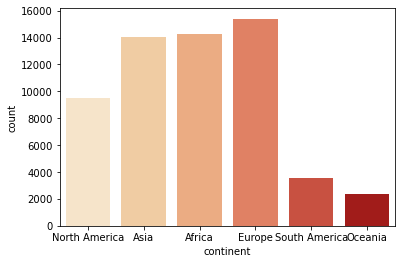

In [77]:
#From the count plot, we can see that COVID has affected more in Europe.
sns.countplot(x='continent',data=analyse_data_cardio, palette="OrRd")

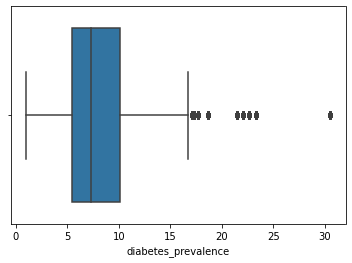

In [74]:
sns.boxplot(analyse_data_cardio['diabetes_prevalence'])

In [ ]:
sns.boxplot(analyse_data_cardio['male_smokers'])

In [ ]:
sns.boxplot(analyse_data_cardio['female_smokers'])

There are outliers in the columns 'male_smokers', 'female_smokers', 'diabetes_prevalence'. Nothing is to modify for now.

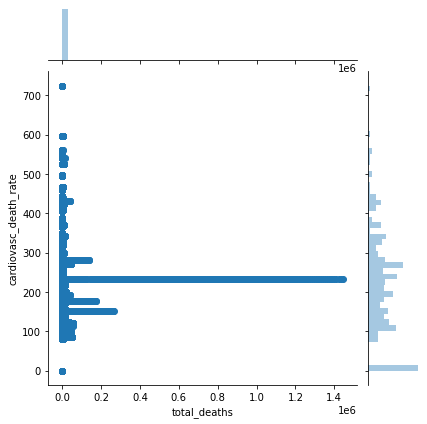

In [87]:
sns.jointplot(x="total_deaths", y="cardiovasc_death_rate", data=analyse_data_cardio,kind="scatter")
#sns.catplot(x="total_deaths",y="cardiovasc_death_rate",data=analyse_data_cardio,hue="continent")

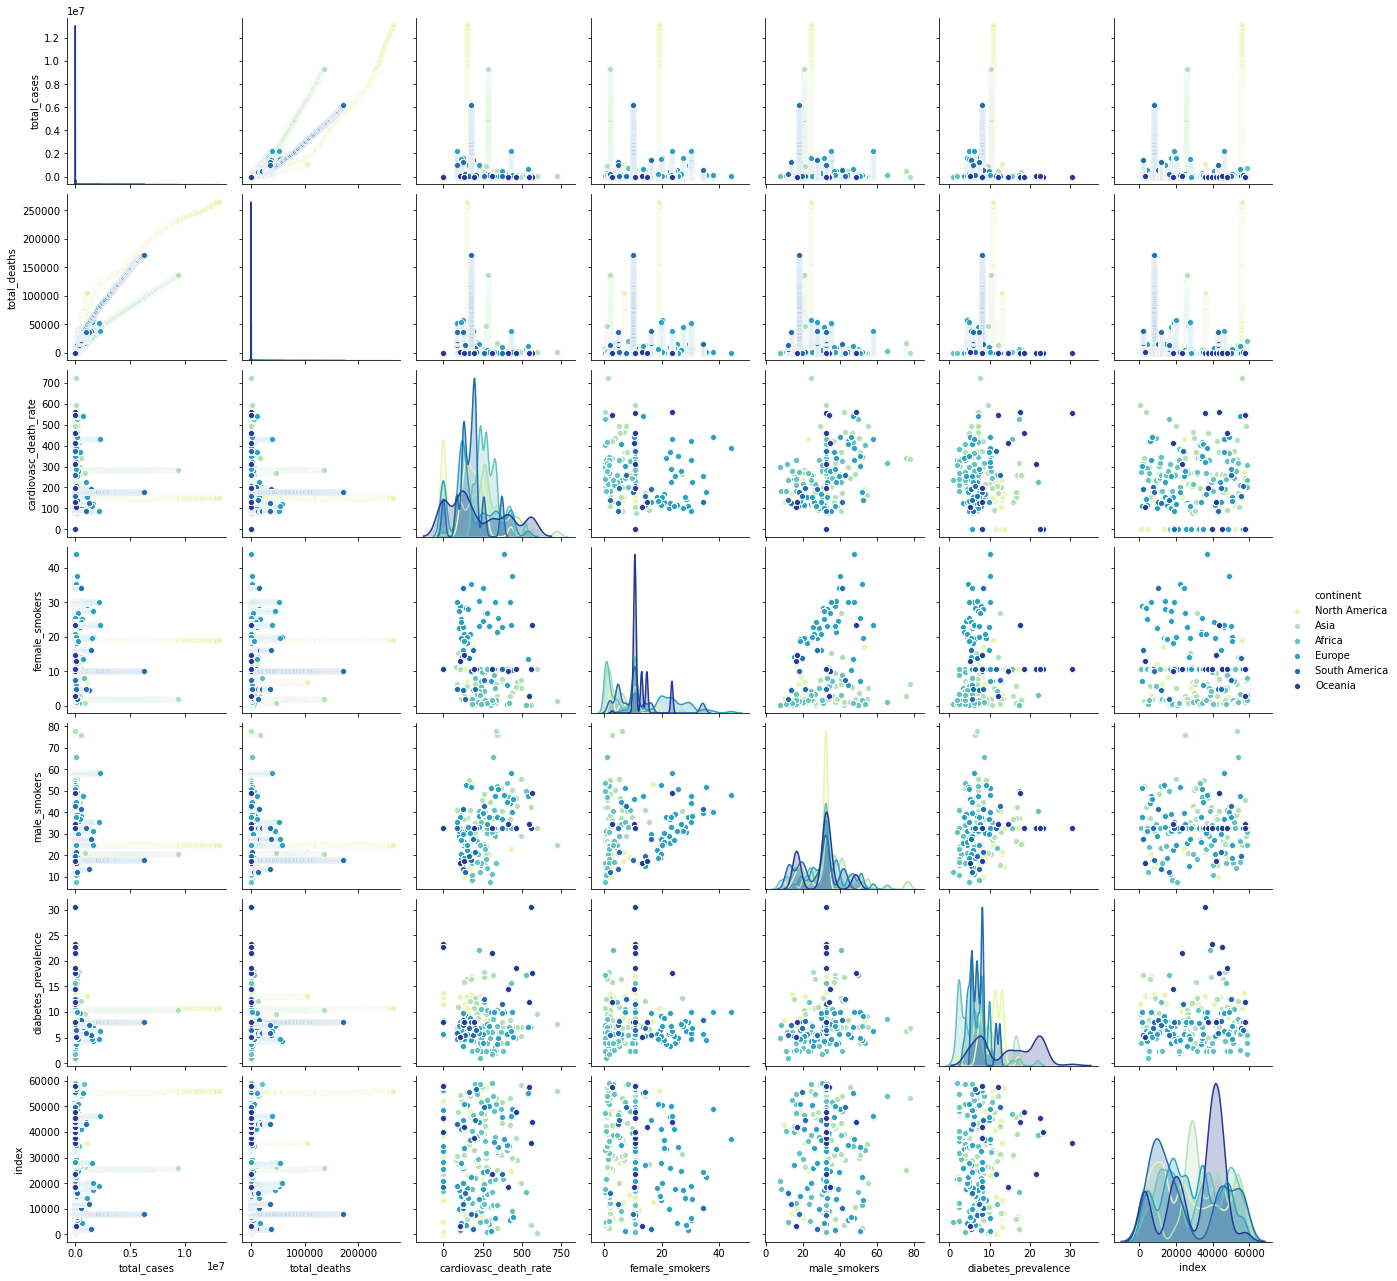

In [88]:
sns.pairplot(analyse_data_cardio,hue="continent",palette="YlGnBu")
#From the below graph, we can consider that
# The 'total_cases' have a linear relationship with the 'total_deaths'.
# The 'cardiovasc_death_rate' has no relation with the 'total_cases'. With the increase in the total_cases, 
# there is not much increase in the 'cardiovasc_death_rate' has the scatter points lie in between 0-0.2.
# The same is the case with 'smokers' and 'diabetes'. There is no relation between the columns and the total_cases.

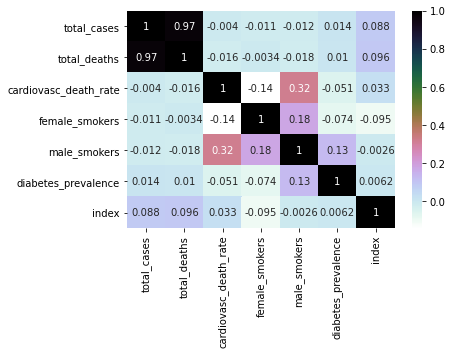

In [89]:
sns.heatmap(analyse_data_cardio.corr(),annot=True,cmap='cubehelix_r')
# From the graph below, we can see that the columns 'total_cases' and 'total_deaths' has the good correlation. 
# The columns 'cardiovasc_death_rate', 'female_smokers', 'male_smokers', 'diabetes_prevalence' has the good correlation.